# Credit Card Fraud Detection with a neural network and tensorflow

### First install the python plugins

In [ ]:
pip install pandas scikit-learn tensorflow matplotlib seaborn requests kaggle kagglehub

### Import the functions

In [17]:
import os
import json
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
import sys
import importlib.util
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # To split the dataset and perform hyperparameter tuning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve   # For evaluation metrics
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For creating advanced visualizations
import requests  # To download files from the internet

### The code

Select an option:
1. Download the files from GitHub (Works for every compiler)
2. Download the files (Local)
3. Select the files (Local)
4. Exit
Option 3: Select the files (Local)
Loaded file: C:/Users/Ghaith/Documents/GitHub/UP2089173-Credit-Card-Fraud-Detection/py/Q1_folder/creditcard.csv
Epoch 1/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 3s 840us/step - accuracy: 0.9908 - loss: 0.0530 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 2/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 3/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 4/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 6/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 789

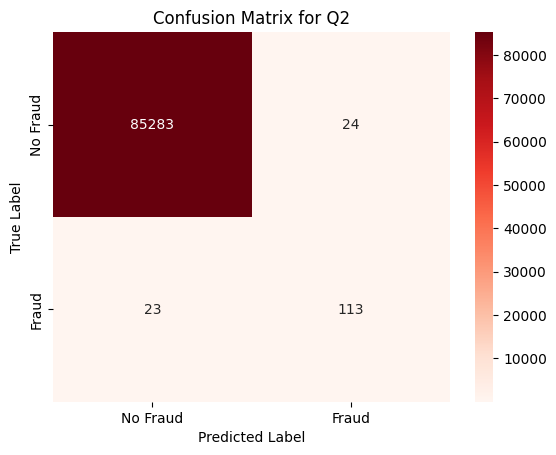

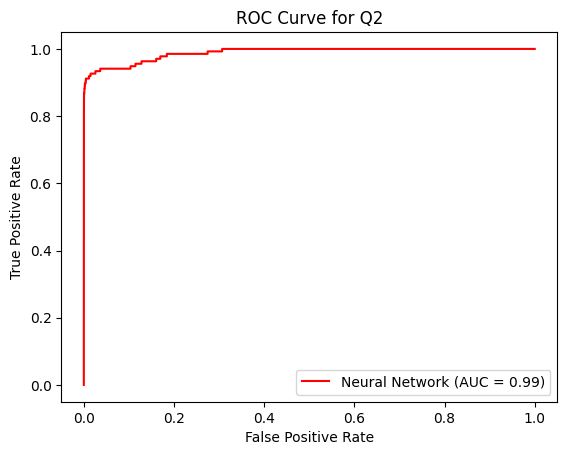

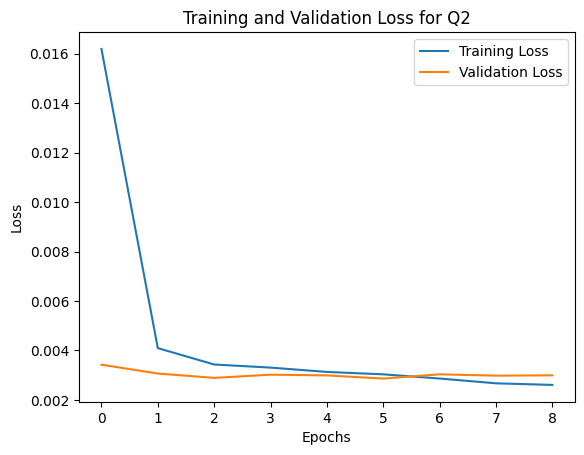

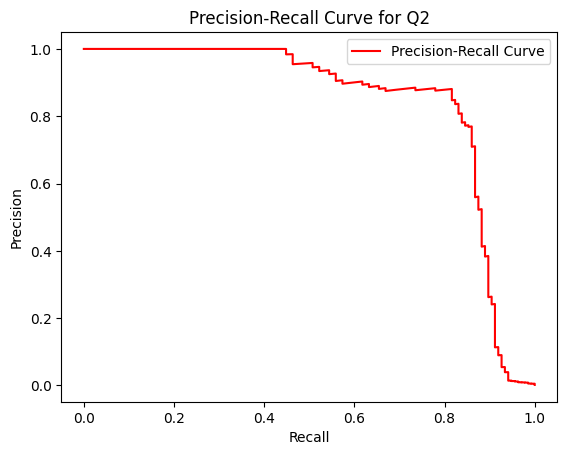

In [18]:
while True:
    # Display options
    print("Select an option:")
    print("1. Download the files from GitHub (Works for every compiler)")
    print("2. Download the files (Local)")
    print("3. Select the files (Local)")
    print("4. Exit")

    # Get user input
    choice = input("Enter your choice (1/2/3/4): ")

    if choice == '1':
        print("Option 1: Download the files from GitHub (Colab)")
        # Add logic for downloading from GitHub here
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
          file.write(response.text)
        # Prompt the user to upload a .py file
        import functions
        functions.download_kaggle_dataset_colab()
        break       
    elif choice == '2':
        print("Option 2: Download the files (Local)")
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
            file.write(response.text)
        root = tk.Tk()
        root.withdraw()
        import functions
        functions.Download_and_Extract_Kaggle_Dataset_Local()
        break

    elif choice == '3':
        print("Option 3: Select the files (Local)")
        root = tk.Tk()
        root.withdraw()
        filename = filedialog.askopenfilename(title="Select a Python file", filetypes=[("Python Files", "*.py")])
        # Get the directory of the selected file
        file_dir = os.path.dirname(os.path.abspath(filename))
        # Check if the file directory is already in sys.path
        if file_dir not in sys.path:
            sys.path.append(file_dir)
        # Use importlib to load the module dynamically
        module_name = os.path.basename(filename).replace(".py", "")
        spec = importlib.util.spec_from_file_location(module_name, filename)
        functions = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(functions)
        data = functions.upload_csv()
        break

    elif choice == '4':
        print("Exiting program.")
        break

    else:
        print("Invalid choice. Please select a valid option (1/2/3/4).")

# Main script for downloading the dataset and processing
# Step 3: Data Preprocessing
data = pd.read_csv("creditcard.csv")  # Load the dataset
X_scaled, y = functions.preprocess_data(data, target_column='Class')  #Utilises a function in the function.py

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Utilises a function in the py where it builds a neural network to the size of the columns in the training data
model = functions.build_neural_network(input_shape=X_train.shape[1])
if model is None:
    print("Model creation failed.")
else:
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    # Train the neural network model using the training data
    history = model.fit(
        # Training data (features), Training data (target labels)
        X_train, y_train,
        # Validation split: Reserve 20% of the training data for validation
        # Helps monitor the model's performance on unseen data during training
        validation_split=0.2,
        # Number of epochs: Train the model for 10 full passes over the training data
        # An epoch is one complete cycle of the forward and backward pass
        epochs=10,
        # Batch size: Divide the training data into batches of 64 samples
        # Each batch is processed independently before updating the model's weights
        batch_size=64,
        # Callbacks: List of functions or utilities to be applied during training
        # `early_stopping` monitors validation performance and stops training early if it stops improving
        callbacks=[early_stopping],
        # Verbosity level: `1` prints a progress bar and training details during training
        # Use `0` for silent mode or `2` for epoch-only summaries
        verbose=1
    )

# Metrics
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > 0.5).astype(int)

# Print the classification report to evaluate precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Calculate and display the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc_roc:.2f}")  # A higher score indicates better performance
# Create a confusion matrix to show true positives
conf_matrix = confusion_matrix(y_test, y_pred)
true_postive_rate= (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]))*100
print(f"Recall (True Positive Rate): {true_postive_rate:.0f}%")

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',  # Changed to 'Reds'
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix for Q2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 7: Visualize the Results
# Compute the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_roc:.2f})', color='red')  # Changed color to red
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Q2')
plt.legend()
plt.show()

# Training Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Q2')
plt.legend()
plt.show()

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve', color='red')  # Changed color to red
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Q2')
plt.legend()
plt.show()

### Explanations behind this code 
The start of this code is very similar to Q1 and utilises many of the same functions as from the functions.py file as in previous versions, and instead of doing logistic regression it utilises an additional function, build_neural_network().

The usage of a neural network is ideal for capturing the complex, non-obvious patterns present in fraudulent versus non-fraudulent transactions. The neural network is dynamically constructed based on the number of input features, ensuring flexibility. It consists of two hidden layers—32 neurons in the first with ReLU activation, followed by a 20% dropout to prevent overfitting, and 16 neurons in the second hidden layer with ReLU activation. The output layer has a single neuron with sigmoid activation, making it suitable for binary classification. The model is compiled using the Adam optimizer (learning rate 0.001), binary cross-entropy as the loss function, and accuracy as the evaluation metric. Early stopping is employed to halt training if validation performance degrades, ensuring efficient training and better generalization. This is particularly important for imbalanced datasets, where fraud is much less frequent than non-fraudulent transactions. The model’s ability to identify subtle patterns, combined with evaluation techniques like AUC-ROC, enhances its ability to minimize false positives while effectively detecting fraud. In case of an error during model creation, the function gracefully handles it by returning None; otherwise, it returns the compiled model, ready for training.

To evaluate model performance, the code generates a classification report, AUC-ROC score, confusion matrix, and several visualizations, including the ROC curve, confusion matrix heatmap, and precision-recall curve. The classification report provides critical metrics such as precision, recall, F1-score, and support, which are essential for assessing performance, especially in imbalanced datasets where accuracy can be misleading. The AUC-ROC score offers a concise evaluation of the model's ability to distinguish between classes (fraud vs. non-fraud), while the confusion matrix reveals counts of true positives, false positives, true negatives, and false negatives, giving insight into the recall (true positive rate), which is particularly important in fraud detection. Visualizations like the ROC curve and confusion matrix heatmap further improve interpretability. The precision-recall curve is also plotted, emphasizing the balance between precision and recall, which is crucial in cases with underrepresented classes like fraudulent transactions.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


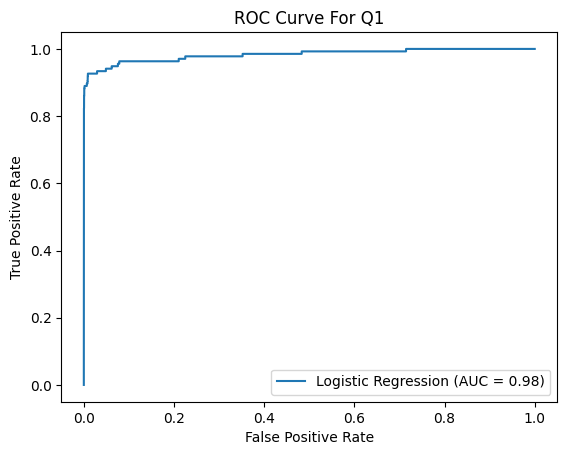

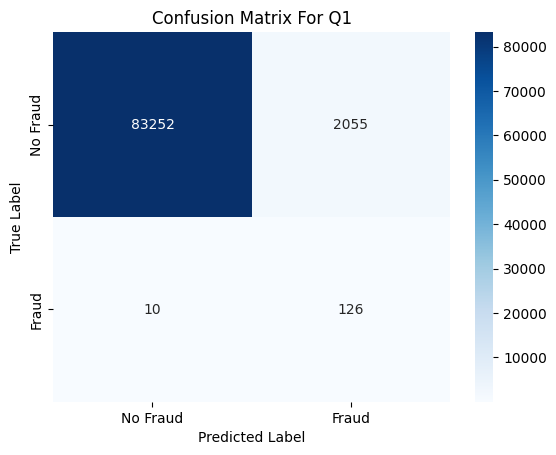

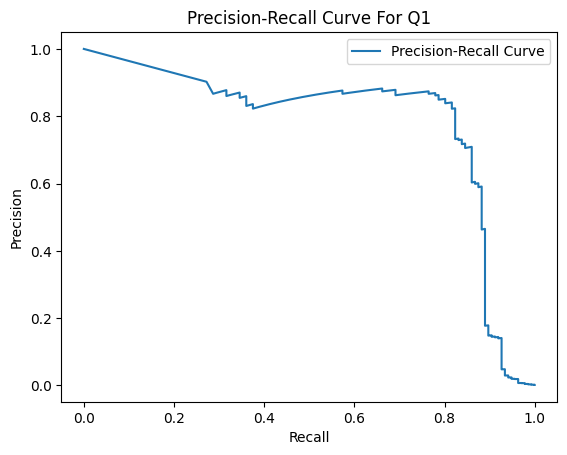

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import  auc

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'] 
}

f1_scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),  
    param_grid=param_grid,
    scoring={'roc_auc': 'roc_auc', 'f1': f1_scorer},  
    refit='roc_auc',  
    cv=5,  
    verbose=1,  
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]


conf_matrix = confusion_matrix(y_test, y_pred)
true_positive_rate = (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])) * 100


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_roc = auc(fpr, tpr)


plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Q1')
plt.legend()
plt.show()

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix For Q1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')  
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve For Q1')  
plt.legend()  
plt.show() 

### Comparing Q1 to Q2

When comparing the two different models (Logistic Regression and Neural network) we can see they both demonstrate good performance, with the neural network and Logistic regression having very similar AUC scores on average.

The neural network model also correctly classified more instances overall, with 85,286 "No Fraud" and 21 "Fraud" cases, compared to 83,252 "No Fraud" and 2,055 "Fraud" cases for the Logistic Regression model. Both models had low numbers of false positives, with the neural network model misclassifying 28 instances and the Logistic Regression model misclassifying 10 instances.

The precision-recall curves indicate the neural network model maintains higher precision at higher recall levels compared to the Logistic Regression model. Overall, the performance of both models is impressive, with the neural network model demonstrating a slight edge in terms of ROC AUC and precision-recall trade-offs, with a slightly longer run time in Local and Google Collab compliers.